# 
I will apply various classification algorithms to predict the payment for credit card for next month is defaulted or not


The bank is facing issues in tracking the regular payment of credit card thereby leading to increase in the involvement of their assets. I, as a Data Scientist have to create a model to predict the customers who will default for the next month.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # to ignore warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [2]:
credit = pd.read_csv("UCI_Credit_Card.csv")

In [3]:
credit.shape

(30000, 25)

In [4]:
credit.head() ### Glimpse of the data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
# Categorical variables description
credit[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [6]:
# Payment delay description
credit[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [7]:
#Previous Payment Description
credit[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [8]:
credit.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [9]:
# Removing ID variable as it has no relevnce for logistic regression model
credit.drop(['ID'],axis=1, inplace=True)

In [10]:
# Checking for any null values
credit.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#
Check either the data is balanced or not

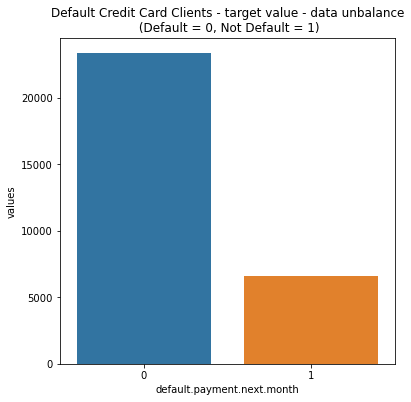

In [11]:
## Checking for data unbalance
temp = credit["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

#
Around 22% of clients will default next month. The data has not a large unbalance with respect of the target value (default.payment.next.month).

In [12]:
credit.SEX.value_counts() #this is fine, more women than men

2    18112
1    11888
Name: SEX, dtype: int64

In [13]:
credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [14]:
credit.EDUCATION.value_counts() # yes, I am using different ways of calling a column

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

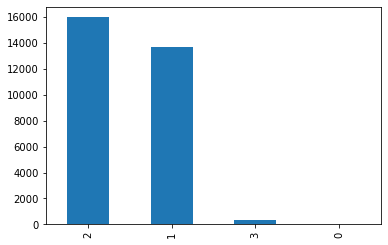

In [15]:
credit.MARRIAGE.value_counts().plot(kind = 'bar')

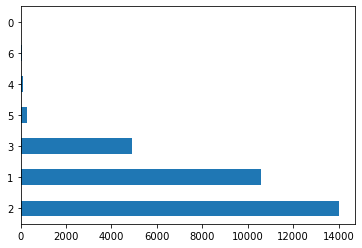

In [16]:
credit.EDUCATION.value_counts().plot(kind = "barh")

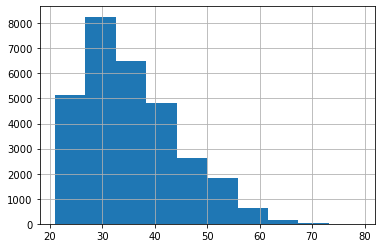

In [20]:
credit.AGE.hist()

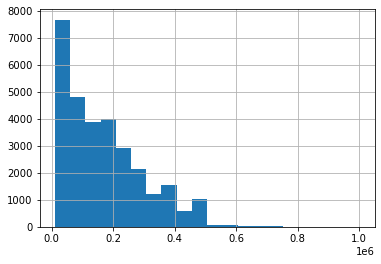

In [21]:
credit.LIMIT_BAL.hist(bins = 20)

In [22]:
fil = (credit.EDUCATION == 5) | (credit.EDUCATION == 6) | (credit.EDUCATION == 0)
credit.loc[fil, 'EDUCATION'] = 4
credit.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [23]:
credit.loc[credit.MARRIAGE == 0, 'MARRIAGE'] = 3
credit.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [26]:
credit.groupby(['SEX', 'default.payment.next.month']).size()

SEX  default.payment.next.month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
dtype: int64

In [27]:
gender = credit.groupby(['SEX', 'default.payment.next.month']).size().unstack(1)
gender

default.payment.next.month,0,1
SEX,,
1,9015,2873
2,14349,3763


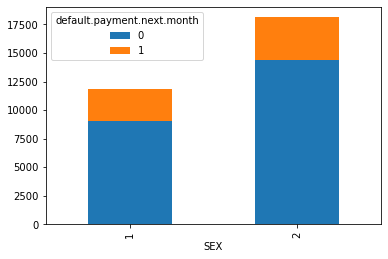

In [31]:
gender.plot(kind='bar', stacked = True)

In [32]:
credit[["SEX", "default.payment.next.month"]].groupby(['SEX'], as_index=False).mean().sort_values(by='default.payment.next.month', ascending=False)

,SEX,default.payment.next.month
0,1,0.241672
1,2,0.207763


In [33]:
credit[["SEX", "default.payment.next.month"]].groupby(['SEX']).mean().sort_values(by='default.payment.next.month')

,default.payment.next.month
SEX,
2,0.207763
1,0.241672


In [34]:
def corr_2_cols(Col1, Col2):
    res = credit.groupby([Col1, Col2]).size().unstack()
    return res

In [35]:
corr_2_cols('EDUCATION', 'default.payment.next.month')

default.payment.next.month,0,1
EDUCATION,,
1,8549,2036
2,10700,3330
3,3680,1237
4,435,33


In [36]:
corr_2_cols('MARRIAGE', 'default.payment.next.month')

default.payment.next.month,0,1
MARRIAGE,,
1,10453,3206
2,12623,3341
3,288,89


In [37]:
corr_2_cols('MARRIAGE', 'SEX')

SEX,1,2
MARRIAGE,,
1,5190,8469
2,6553,9411
3,145,232


In [38]:
corr_2_cols('EDUCATION', 'SEX')

SEX,1,2
EDUCATION,,
1,4354,6231
2,5374,8656
3,1990,2927
4,170,298


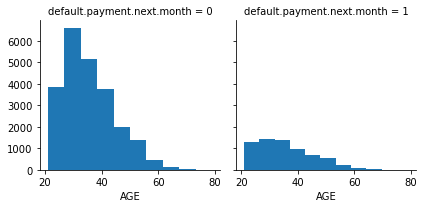

In [39]:
g = sns.FacetGrid(credit, col = 'default.payment.next.month')
g.map(plt.hist, 'AGE')

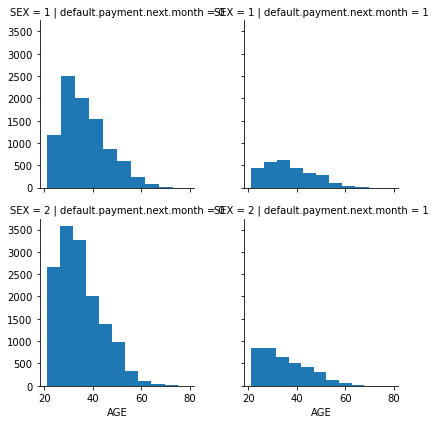

In [40]:
g = sns.FacetGrid(credit, col = 'default.payment.next.month', row = 'SEX')
g.map(plt.hist, 'AGE')

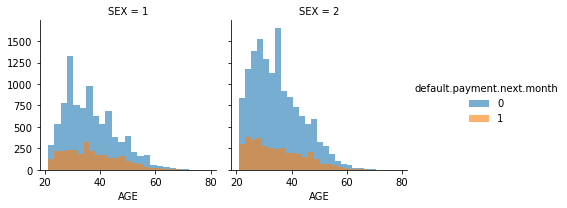

In [41]:
g = sns.FacetGrid(credit, col='SEX', hue='default.payment.next.month')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

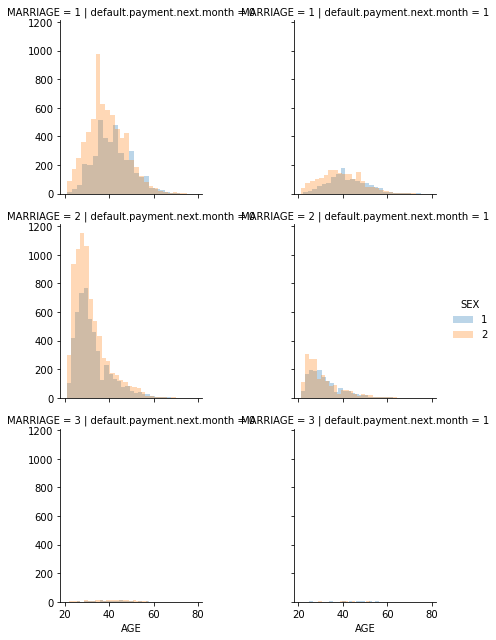

In [42]:
g = sns.FacetGrid(credit, col='default.payment.next.month', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

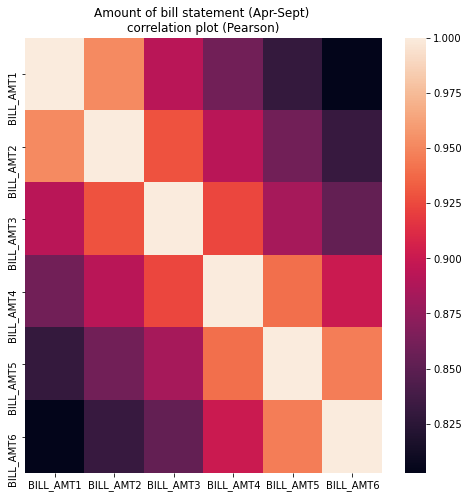

In [43]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = credit[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()


In [62]:
credit = pd.read_csv("UCI_Credit_Card.csv")

In [63]:
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [64]:
credit_dummies = pd.get_dummies(credit, columns = cat_features)

In [65]:
print("Default of Credit Card Clients train data -  rows:",credit_dummies.shape[0]," columns:", credit_dummies.shape[1])

Default of Credit Card Clients train data -  rows: 30000  columns: 93


In [66]:
target= 'default.payment.next.month'
predictors = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5',
       'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'SEX_1',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'PAY_0_-2',
       'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_2_-2', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1',
       'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7',
       'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3',
       'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_6_-2',
       'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7']

In [67]:
X = credit_dummies[predictors]
y=credit_dummies['default.payment.next.month']

In [68]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [69]:
X_train.shape

(24000, 80)

In [70]:
X_test.shape

(6000, 80)

In [71]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression  0.776833        0.0     0.0       0.0


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
confusion_matrix(y_test,y_pred)

array([[4661,    0],
       [1339,    0]], dtype=int64)

In [76]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [77]:
from imblearn.over_sampling import SMOTE

In [79]:
sm = SMOTE(random_state=589)

In [81]:
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))

37406


In [82]:
classifier1 = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
classifier1.fit(X_SMOTE, y_SMOTE)

LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')

In [83]:
#### Predicting on X_test dataset
y_pred1 = classifier1.predict(X_test)

In [84]:
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

model_results = pd.DataFrame([['Logistic Regression - with SMOTE', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.776833   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.562833   0.301607  0.728902  0.426667


In [85]:
confusion_matrix(y_test,y_pred1)

array([[2401, 2260],
       [ 363,  976]], dtype=int64)

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
clf = DecisionTreeClassifier(random_state=14) 
# training the classifier
clf.fit(X_train, y_train)
# do our predictions on the test
pred_dt = clf.predict(X_test)

In [106]:
from sklearn import tree

In [88]:
# Predicting Test Set
acc = accuracy_score(y_test, pred_dt)
prec = precision_score(y_test, pred_dt)
rec = recall_score(y_test, pred_dt)
f1 = f1_score(y_test, pred_dt)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.776833   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.562833   0.301607  0.728902  0.426667
2                     Decision Tree  0.723500   0.385714  0.403286  0.394304


In [109]:
from sklearn.tree import plot_tree

In [110]:
plot_tree(clf)

[Text(256.80311121827924, 215.2656, 'X[26] <= 0.5\ngini = 0.344\nsamples = 24000\nvalue = [18703, 5297]'),
 Text(206.38871912132427, 210.9168, 'X[36] <= 0.5\ngini = 0.289\nsamples = 21863\nvalue = [18033, 3830]'),
 Text(132.59250642893716, 206.56799999999998, 'X[8] <= 781.0\ngini = 0.255\nsamples = 20001\nvalue = [17002, 2999]'),
 Text(70.28696705320455, 202.2192, 'X[37] <= 0.5\ngini = 0.365\nsamples = 4787\nvalue = [3636, 1151]'),
 Text(64.2697821592976, 197.8704, 'X[65] <= 0.5\ngini = 0.353\nsamples = 4641\nvalue = [3579, 1062]'),
 Text(56.40037345128184, 193.5216, 'X[10] <= 1810.0\ngini = 0.341\nsamples = 4430\nvalue = [3464, 966]'),
 Text(47.11470195296582, 189.1728, 'X[4] <= 1870.5\ngini = 0.365\nsamples = 3550\nvalue = [2696, 854]'),
 Text(37.87890015984499, 184.824, 'X[2] <= 712.0\ngini = 0.352\nsamples = 3244\nvalue = [2503, 741]'),
 Text(29.535939405375004, 180.4752, 'X[1] <= 55.5\ngini = 0.398\nsamples = 1974\nvalue = [1432, 542]'),
 Text(21.28301546788051, 176.1264, 'X[9] <=

Error in callback <function flush_figures at 0x000002B96E3F94C0> (for post_execute):


KeyboardInterrupt: 

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
f_rf = RandomForestClassifier()
f_rf.fit(X_train, y_train)

RandomForestClassifier()

In [94]:


# Predicting Test Set
y_pred_rf = f_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.776833   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.562833   0.301607  0.728902  0.426667
2                     Decision Tree  0.723500   0.385714  0.403286  0.394304
3               Random Forest(Gini)  0.818667   0.668005  0.372666  0.478428


In [95]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(criterion='entropy')
clf_rf.fit(X_train, y_train)

# Predicting Test Set
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.776833   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.562833   0.301607  0.728902  0.426667
2                     Decision Tree  0.723500   0.385714  0.403286  0.394304
3               Random Forest(Gini)  0.818667   0.668005  0.372666  0.478428
4            Random Forest(Entropy)  0.815667   0.652687  0.371919  0.473834


In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
model_knn4 = KNeighborsClassifier(n_neighbors=4)
model_knn4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [98]:
# Predicting Test Set N=4
pred_knn4= model_knn4.predict(X_test)
acc = accuracy_score(y_test, pred_knn4)
prec = precision_score(y_test, pred_knn4)
rec = recall_score(y_test, pred_knn4)
f1 = f1_score(y_test, pred_knn4)

model_results = pd.DataFrame([['KNN-4 neigbours', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [100]:
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.776833   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.562833   0.301607  0.728902  0.426667
2                     Decision Tree  0.723500   0.385714  0.403286  0.394304
3               Random Forest(Gini)  0.818667   0.668005  0.372666  0.478428
4            Random Forest(Entropy)  0.815667   0.652687  0.371919  0.473834
5                   KNN-4 neigbours  0.766000   0.409972  0.110530  0.174118


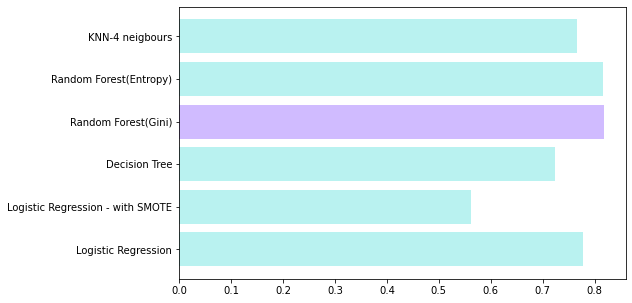

In [101]:
plt.figure(figsize=(8,5))
max_acc_index=results.Accuracy[results.Accuracy==results.Accuracy.max()].index[0]
plt.barh(results.Model,results.Accuracy,color='c')
plt.barh(results.Model[max_acc_index],results.Accuracy[max_acc_index],color='m')
plt.show()

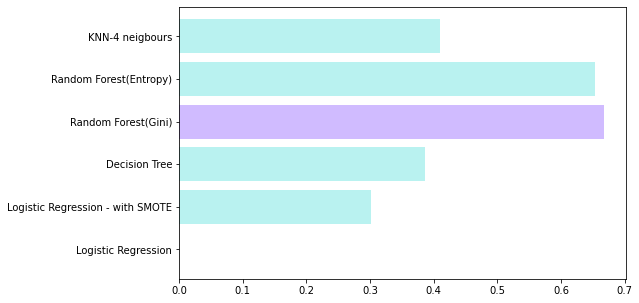

In [102]:
plt.figure(figsize=(8,5))
max_pre_index=results.Precision[results.Precision==results.Precision.max()].index[0]
plt.barh(results.Model,results.Precision,color='c')
plt.barh(results.Model[max_pre_index],results.Precision[max_pre_index],color='m')
plt.show()

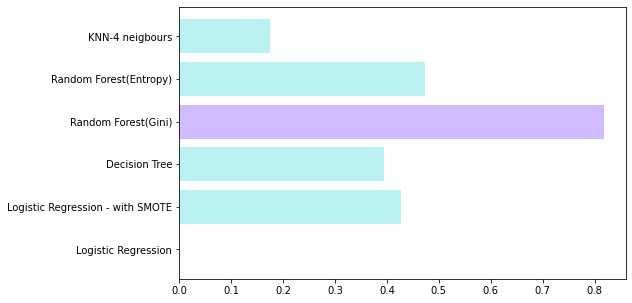

In [105]:
plt.figure(figsize=(8,5))
max_f1_index=results['F1 Score'][results['F1 Score']==results['F1 Score'].max()].index[0]
plt.barh(results.Model,results['F1 Score'],color='c')
plt.barh(results.Model[max_f1_index],results.Accuracy[max_f1_index],color='m')
plt.show()